### Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Column Information

#### People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

### Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month



In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import datetime
from datetime import date

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
#READ THE DATASET...
df = pd.read_csv("marketing_campaign.csv",sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
data = df.dropna()

In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [9]:
#FINDING THE NUMBER OF UNIQUE VALUES PRESENT IN EACH COLUMN...
data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [10]:
df=data.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

## Univariate Analysis

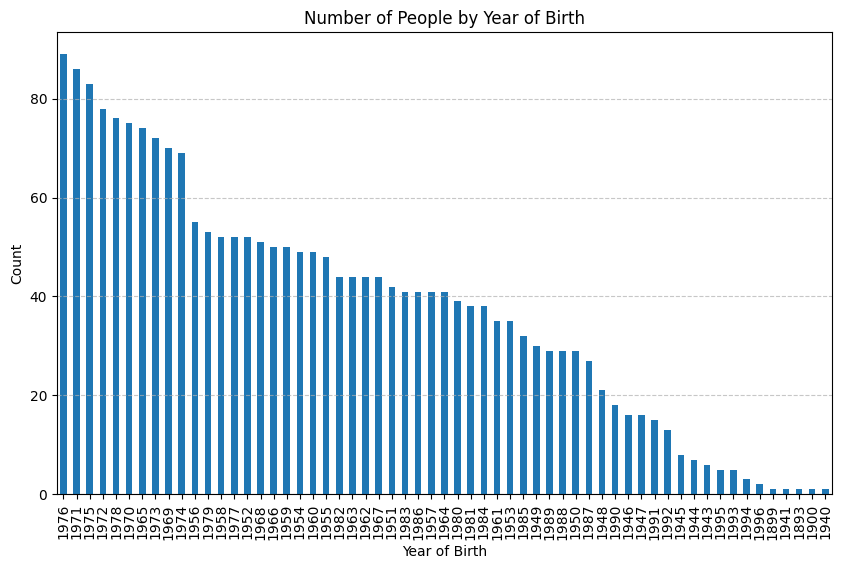

In [11]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "Year_Birth"
birth_years_counts = df["Year_Birth"].value_counts()

plt.figure(figsize=(10, 6))
birth_years_counts.plot(kind='bar')
plt.xlabel('Year of Birth')
plt.ylabel('Count')
plt.title('Number of People by Year of Birth')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [13]:
#CHANGING CATEGORY INTO "UG" AND "PG" ONLY....
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Post Graduate')  
df['Education'] = df['Education'].replace(['Basic'], 'Under Graduate')

In [14]:
df['Education'].value_counts()

Education
Post Graduate     2162
Under Graduate      54
Name: count, dtype: int64

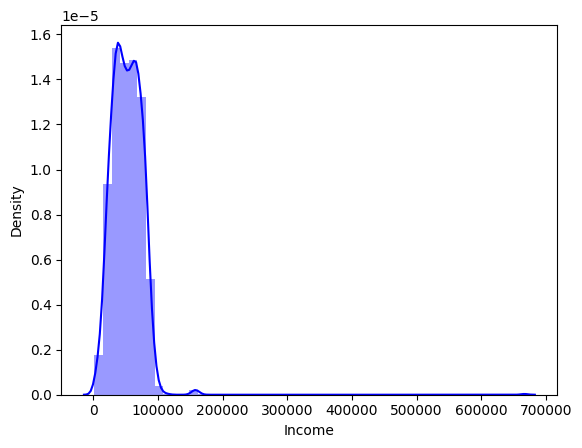

In [15]:
sns.distplot(df["Income"],color = 'blue')
plt.show()

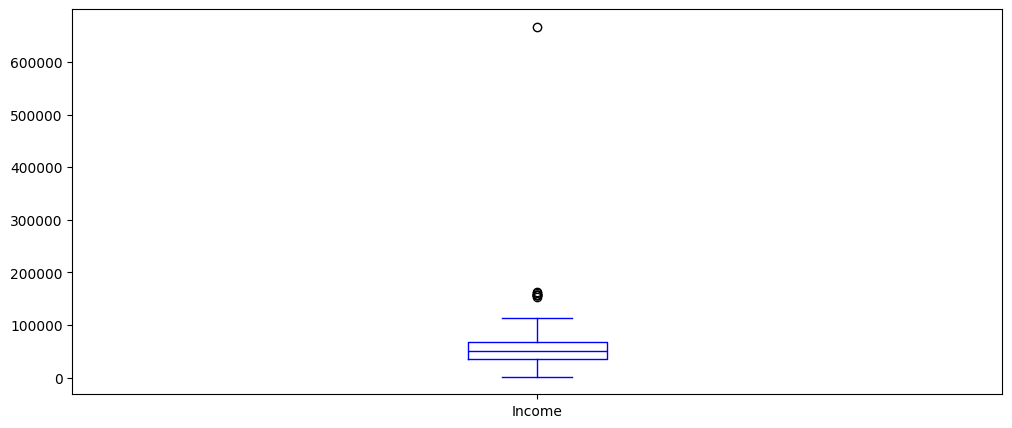

In [16]:
df["Income"].plot.box(figsize=(12,5),color = 'blue')
plt.show()

In [17]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

In [18]:
df.Kids.value_counts()

Kids
1    1117
0     633
2     416
3      50
Name: count, dtype: int64

In [19]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Expenses, dtype: int64

In [20]:
df['Expenses'].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Expenses, dtype: float64

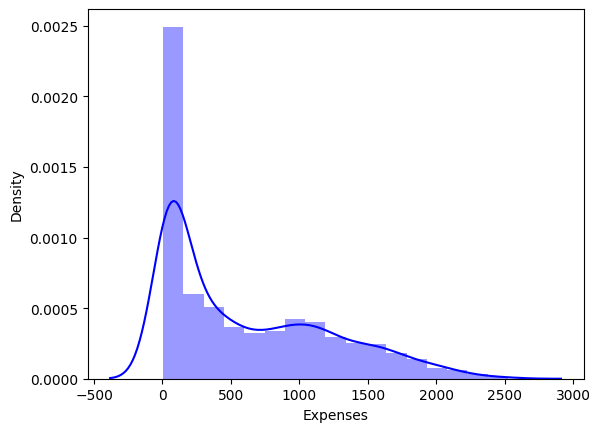

In [21]:
sns.distplot(df["Expenses"],color = 'blue')
plt.show()

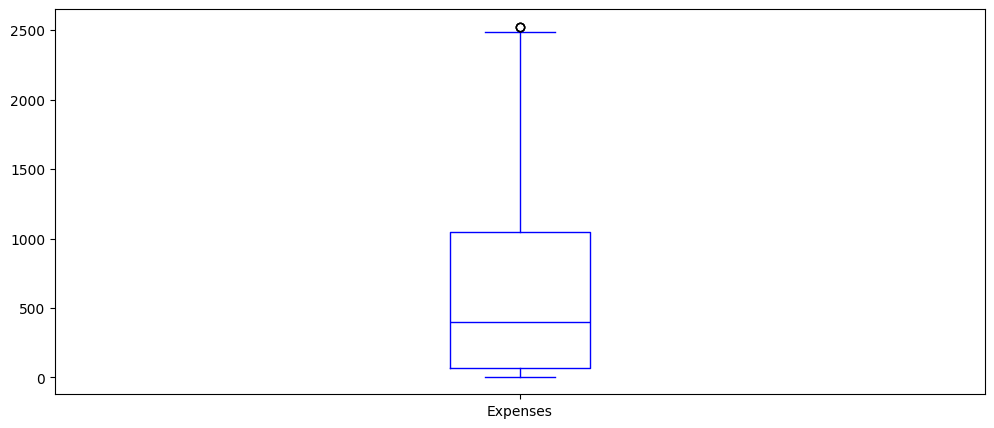

In [22]:
df["Expenses"].plot.box(figsize=(12,5),color='blue')
plt.show()

In [23]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [24]:
#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "TotalAcceptedCmp"
print("Unique categories present in the TotalAcceptedCmp:",df['TotalAcceptedCmp'].value_counts())
print("\n")

Unique categories present in the TotalAcceptedCmp: TotalAcceptedCmp
0    1757
1     323
2      81
3      44
4      11
Name: count, dtype: int64




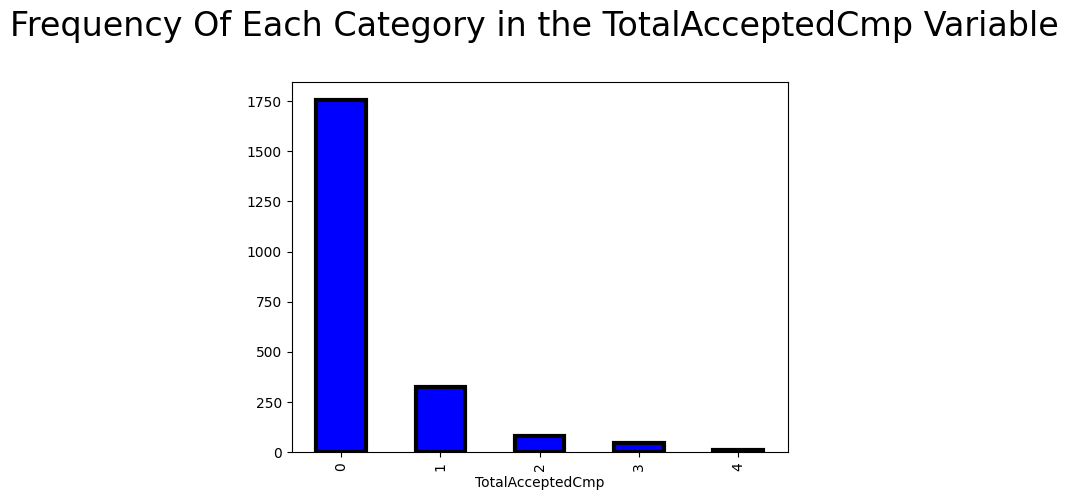

In [25]:
df['TotalAcceptedCmp'].value_counts().plot(kind='bar',color = 'blue',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the TotalAcceptedCmp Variable \n",fontsize=24)
plt.show()

79.33% of Customers accepted the offer in the campaign are "0".
14.50% of Customers accepted the offer in the campaign are "1".
3.70% of Customers accepted the offer in the campaign are "2".
1.96% of Customers accepted the offer in the campaign are "3".
0.49% of Customers accepted the offer in the campaign are "4".

In [26]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df['NumTotalPurchases'].unique()

array([25,  6, 21,  8, 19, 22, 10,  2, 16, 15,  5, 26,  9, 13, 12, 43, 17,
       20, 14, 11, 18, 28,  7, 24,  4, 29, 23, 27, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [27]:
df.NumTotalPurchases.value_counts()

NumTotalPurchases
7     148
5     143
4     125
6     123
17    115
16    101
19    100
9     100
21     94
20     94
8      93
22     93
23     87
18     79
10     78
15     72
12     70
26     67
25     67
11     66
24     55
14     54
13     44
27     38
28     35
29     18
32     12
31     11
30     11
33      4
34      4
0       4
2       3
1       3
37      1
43      1
35      1
39      1
44      1
Name: count, dtype: int64

In [28]:
df['Customer_Age'] = (pd.Timestamp('now').year) - df['Year_Birth']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,5524,1957,Post Graduate,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,1,0,1617,0,25,67
1,2174,1954,Post Graduate,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,2,27,0,6,70
2,4141,1965,Post Graduate,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,776,0,21,59
3,6182,1984,Post Graduate,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,1,53,0,8,40
4,5324,1981,Post Graduate,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,1,422,0,19,43


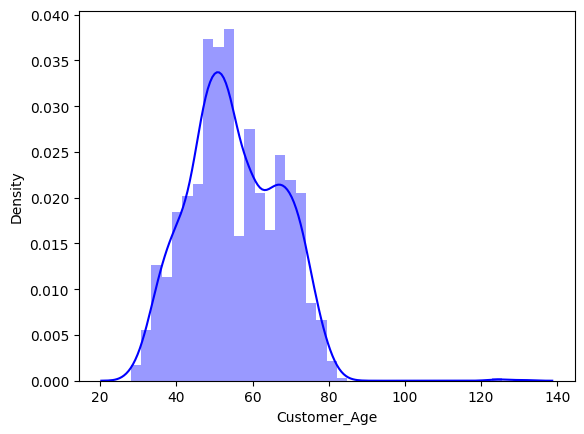

In [29]:
sns.distplot(df["Customer_Age"],color = 'blue')
plt.show()

Most of the cutomers we have are in middle age i.e between 35-55

In [30]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["Year_Birth","ID","AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)

In [31]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Complain', 'Response', 'Kids', 'Expenses', 'TotalAcceptedCmp',
       'NumTotalPurchases', 'Customer_Age'],
      dtype='object')

## Bivariate Analysis

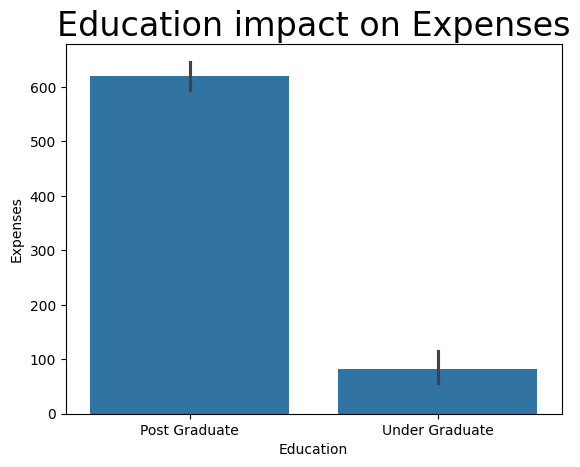

In [32]:
plt.title("Education impact on Expenses",fontsize=24)
ax = sns.barplot(x="Education", y="Expenses", data=df)

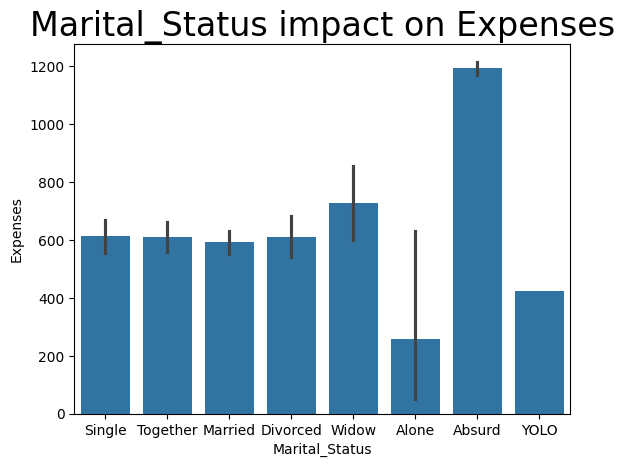

In [33]:
plt.title("Marital_Status impact on Expenses",fontsize=24)
ax = sns.barplot(x="Marital_Status", y="Expenses", data=df)

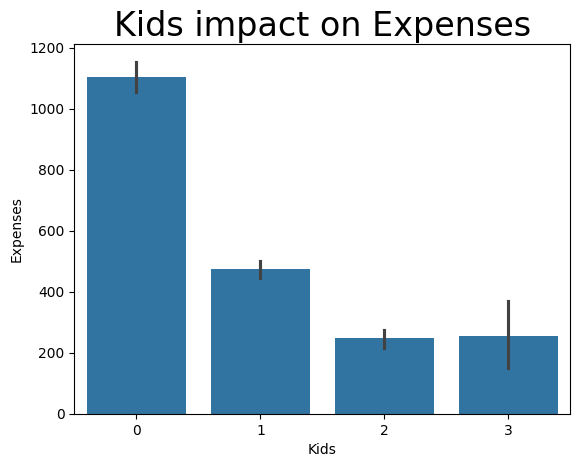

In [34]:
plt.title("Kids impact on Expenses",fontsize=24)
ax = sns.barplot(x="Kids", y="Expenses", data=df)

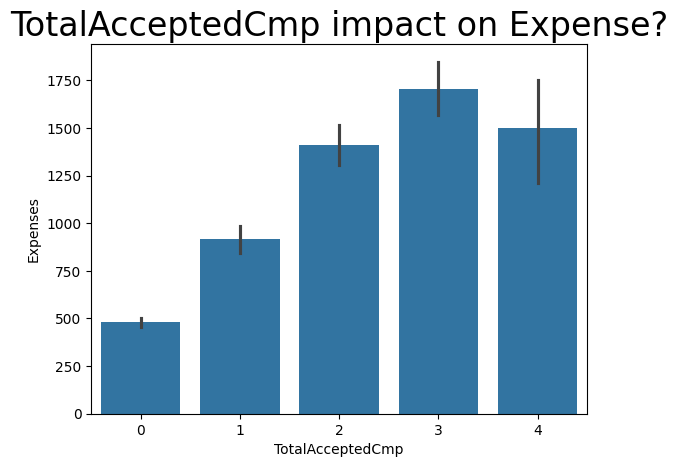

In [35]:
plt.title("TotalAcceptedCmp impact on Expense?",fontsize=24)
ax = sns.barplot(x="TotalAcceptedCmp", y="Expenses", data=df)

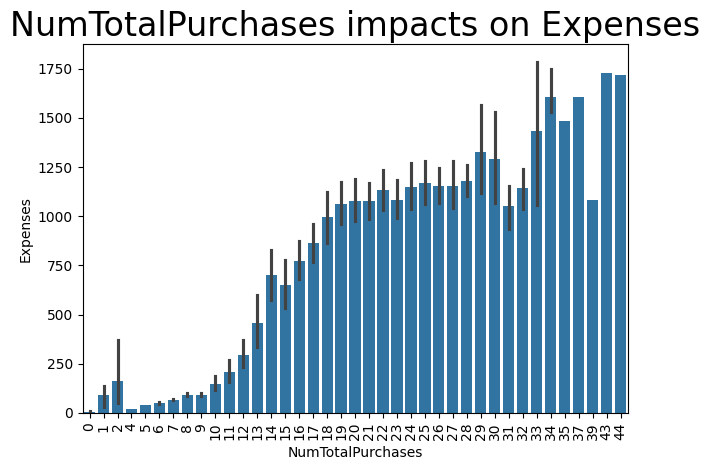

In [36]:
plt.title("NumTotalPurchases impacts on Expenses",fontsize=24)
ax = sns.barplot(x="NumTotalPurchases", y="Expenses", data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

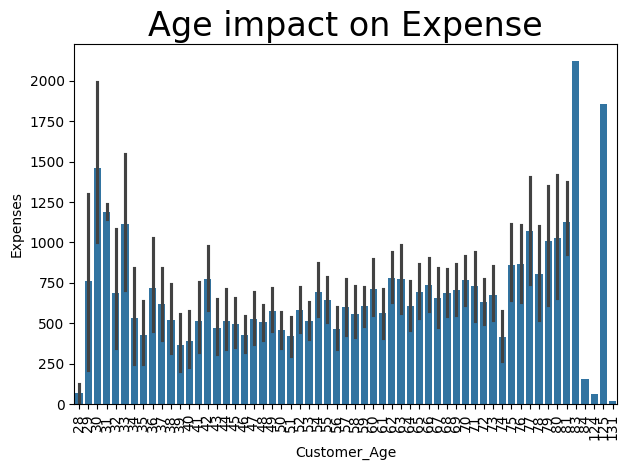

In [37]:
plt.title("Age impact on Expense",fontsize=24)
ax = sns.barplot(x="Customer_Age", y="Expenses", data=df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
df = df[df['Customer_Age'] < 90]
df = df[df['Income'] < 300000]

In [51]:
df = df.drop('Dt_Customer',axis=1)

In [52]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,0,4,0.287105,58,0,1,-1.264598,1.676245,-0.43916,1.317945,1.018352
1,0,4,-0.260882,38,0,0,1.404572,-0.963297,-0.43916,-1.159273,1.274785
2,0,5,0.913196,26,0,0,-1.264598,0.280110,-0.43916,0.796425,0.334530
3,0,5,-1.176114,26,0,0,0.069987,-0.920135,-0.43916,-0.898513,-1.289547
4,0,3,0.294307,94,0,0,0.069987,-0.307562,-0.43916,0.535666,-1.033114


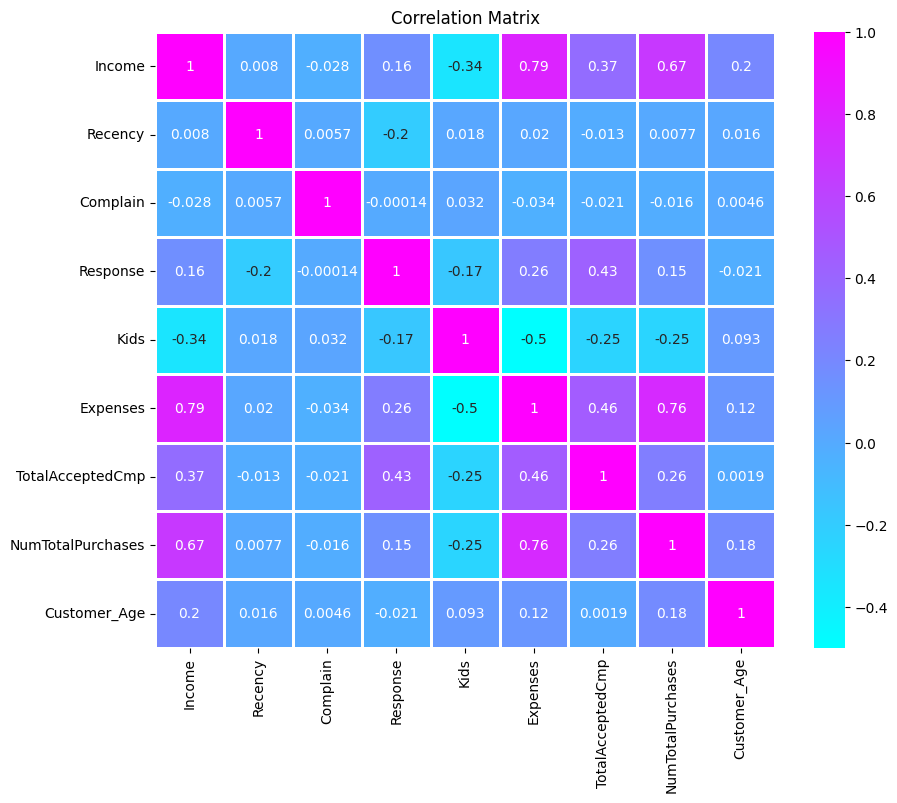

In [53]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='cool', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

In [54]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

In [55]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Complain',
       'Response', 'Kids', 'Expenses', 'TotalAcceptedCmp', 'NumTotalPurchases',
       'Customer_Age'],
      dtype='object')

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_scale = ['Income', 'Kids', 'Expenses',
       'TotalAcceptedCmp', 'NumTotalPurchases', 'Customer_Age']

df[col_scale] = scaler.fit_transform(df[col_scale])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2212 non-null   int64  
 1   Marital_Status     2212 non-null   int64  
 2   Income             2212 non-null   float64
 3   Recency            2212 non-null   int64  
 4   Complain           2212 non-null   int64  
 5   Response           2212 non-null   int64  
 6   Kids               2212 non-null   float64
 7   Expenses           2212 non-null   float64
 8   TotalAcceptedCmp   2212 non-null   float64
 9   NumTotalPurchases  2212 non-null   float64
 10  Customer_Age       2212 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 271.9 KB


In [57]:
df.head()

,Education,Marital_Status,Income,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Customer_Age
0,0,4,0.287105,58,0,1,-1.264598,1.676245,-0.43916,1.317945,1.018352
1,0,4,-0.260882,38,0,0,1.404572,-0.963297,-0.43916,-1.159273,1.274785
2,0,5,0.913196,26,0,0,-1.264598,0.280110,-0.43916,0.796425,0.334530
3,0,5,-1.176114,26,0,0,0.069987,-0.920135,-0.43916,-0.898513,-1.289547
4,0,3,0.294307,94,0,0,0.069987,-0.307562,-0.43916,0.535666,-1.033114


In [83]:
X_0 = df.copy()

In [84]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X_0)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'